In [67]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from common_base import binarise

In [68]:
# Group A
DATA_PATH = "../results/plco/correct_pipeline/smote_xgb/groupA/over"
cvs_a = []
tests_a = []

for ratio in range(0, 9):
    repo = DATA_PATH+f"{ratio}/cv/"
    cv_scores = []
    cv_best_scores = []
    for i in range(0, 30):
        cv_best_score = 0
        for j in range(0, 5):
            file_name = repo+f"smote_xgb_{i}_{j}.pkl"
            with open(file_name, "rb") as f:
                result = pickle.load(f)
                if result["roc"] > cv_best_score:
                    cv_best_score = result["roc"]
                cv_scores.append(result["roc"])
        cv_best_scores.append(cv_best_score)
    cvs_a.append(cv_best_scores)

    # Test Results of the threshold tuning
    # repo = f"/home/jovyan/work/results/{oc_or_plco}/correct_pipeline/smote_xgb/{test_name}/ratio{ratio}/test/"
    repo = DATA_PATH+f"{ratio}/test/"
    test_scores = []
    for i in range(0, 30):
        file_name = repo+f"smote_xgb_{i}.pkl"
        result, model = None, None
        with open(file_name, "rb") as f:
            result = pickle.load(f)
            Y_pred = binarise(result["Y_pred_proba"], result["threshold"])
            test_scores.append(roc_auc_score(result["Y_test"], Y_pred))
    tests_a.append(test_scores)

In [69]:
# Group B
DATA_PATH = "../results/plco/correct_pipeline/smote_xgb/groupB/over"
cvs_b = []
tests_b = []

for ratio in range(0, 9):
    repo = DATA_PATH+f"{ratio}/cv/"
    cv_scores = []
    cv_best_scores = []
    for i in range(0, 30):
        cv_best_score = 0
        for j in range(0, 5):
            file_name = repo+f"smote_xgb_{i}_{j}.pkl"
            with open(file_name, "rb") as f:
                result = pickle.load(f)
                if result["roc"] > cv_best_score:
                    cv_best_score = result["roc"]
                cv_scores.append(result["roc"])
        cv_best_scores.append(cv_best_score)
    cvs_b.append(cv_best_scores)

    # Test Results of the threshold tuning
    # repo = f"/home/jovyan/work/results/{oc_or_plco}/correct_pipeline/smote_xgb/{test_name}/ratio{ratio}/test/"
    repo = DATA_PATH+f"{ratio}/test/"
    test_scores = []
    for i in range(0, 30):
        file_name = repo+f"smote_xgb_{i}.pkl"
        result, model = None, None
        with open(file_name, "rb") as f:
            result = pickle.load(f)
            Y_pred = binarise(result["Y_pred_proba"], result["threshold"])
            test_scores.append(roc_auc_score(result["Y_test"], Y_pred))
    tests_b.append(test_scores)

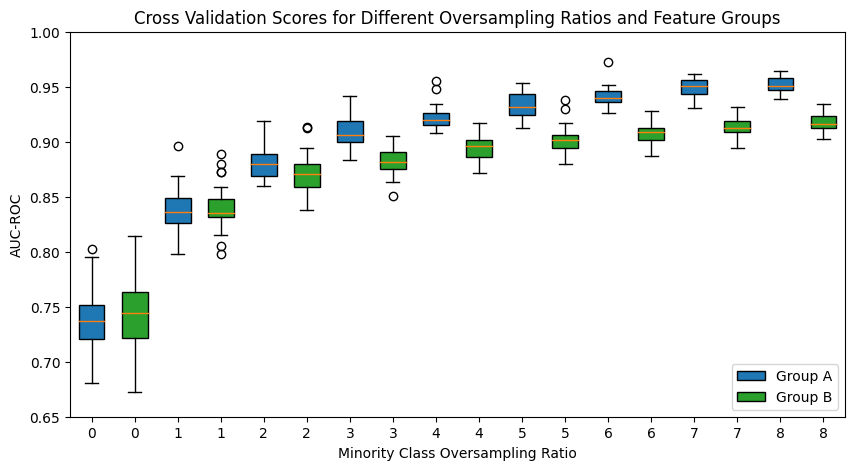

In [93]:
# CVs
fig, ax = plt.subplots(figsize=(10, 5))
bp_a = ax.boxplot(cvs_a, positions=range(0,17,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C0"), labels=range(0,9))

bp_b = ax.boxplot(cvs_b, positions=range(1,18,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=range(0,9))

ax.legend([bp_a["boxes"][0], bp_b["boxes"][0]],
          ['Group A', "Group B"], loc="lower right")
plt.title("Cross Validation Scores for Different Oversampling Ratios and Feature Groups")
plt.ylim(0.65, 1)
plt.xlabel("Minority Class Oversampling Ratio")
plt.ylabel("AUC-ROC")
plt.show()

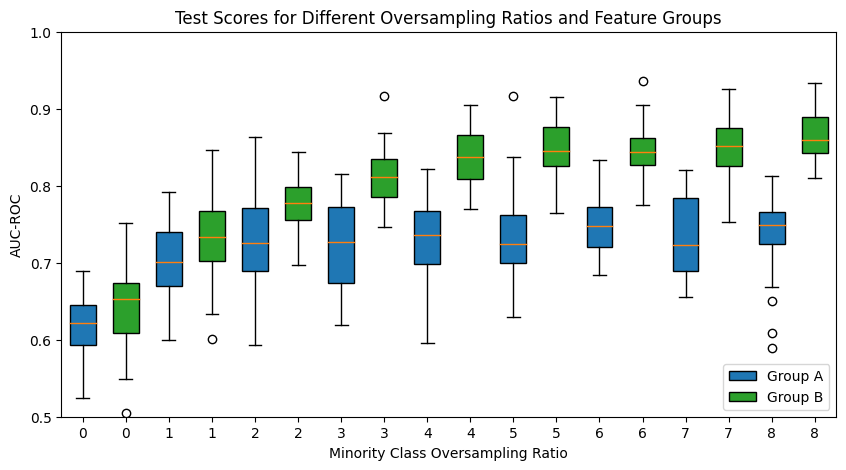

In [94]:
# Tests
fig, ax = plt.subplots(figsize=(10, 5))
bp_a = ax.boxplot(tests_a, positions=range(0,17,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C0"), labels=range(0,9))

bp_b = ax.boxplot(tests_b, positions=range(1,18,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=range(0,9))

ax.legend([bp_a["boxes"][0], bp_b["boxes"][0]],
          ['Group A', "Group B"], loc="lower right")
plt.title("Test Scores for Different Oversampling Ratios and Feature Groups")
plt.ylim(0.5, 1)
plt.xlabel("Minority Class Oversampling Ratio")
plt.ylabel("AUC-ROC")
plt.show()

From this figure above (test scores) we can tell difference between the two feature groups when oversampling techniques are used. Group B has shown better performance than group A although their behaviours were similar when no oversampling technique was applied. Also, we can see the model performance converge when the oversampling ratio is close to 7 or 8. Therefore, we could conclude that features in group B are more effective in this case. 